In [2]:
myDir = '/Users/knu_cgl1/Desktop/Study/repositories'
import os, sys
import random
import math
sys.path.append(myDir)
import myfuncs

In [4]:
with open(f'{myDir}/BIC0711_practice1/GSE16659_series_matrix.txt', 'r') as inFile_raw:
    val_raw = [line[:-1].split('\t')[1] for line in inFile_raw if line[0] == '"']

def isfloat(x):
    try:
        float(x)
        return True
    except:
        return False

val_raw2 = [float(x) for x in list(filter(isfloat, val_raw))]


with open(f'{myDir}/BIC0711_practice1/GSE16659_series_matrix_log2.txt', 'r') as inFile_new:
    val_new = [float(line[:-1].split('\t')[1]) for line in inFile_new if line[0] == '"']

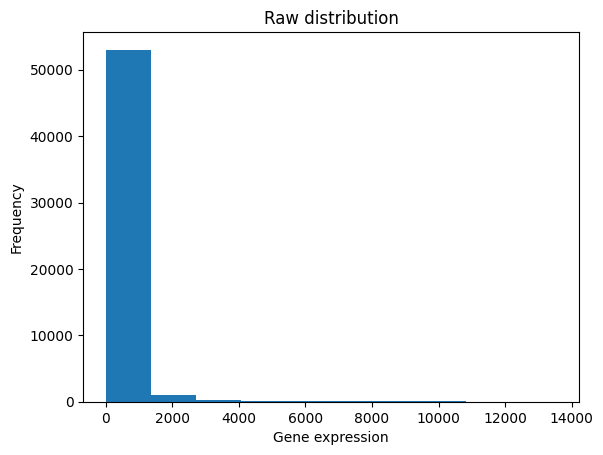

In [5]:
from matplotlib import pyplot as plt
plt.hist(val_raw2)
plt.xlabel('Gene expression')
plt.ylabel('Frequency')
plt.title('Raw distribution')
plt.show()

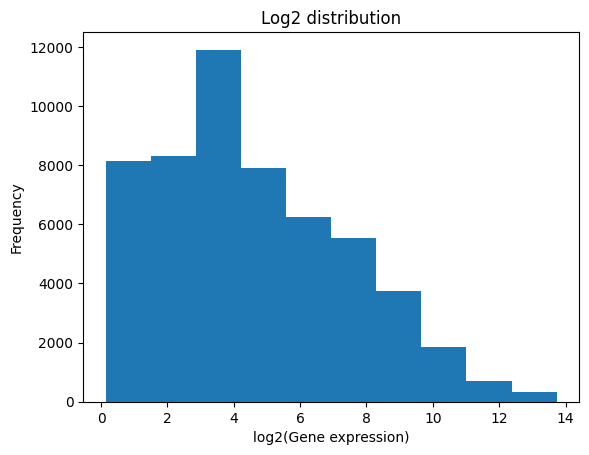

In [6]:
plt.hist(val_new)
plt.xlabel('log2(Gene expression)')
plt.ylabel('Frequency')
plt.title('Log2 distribution')
plt.show()

In [7]:
# Practice 8.
## get information of probe ID
annotFile = open(f'{myDir}/BIC0711_practice1/GPL570-55999.txt', 'r')
annotH = {}
for line in annotFile:
    if line[0] == '#':
        continue
    dataL = line[:-1].split('\t')
    if dataL[0] == 'ID':
        id_idx = dataL.index('ID')
        symbol_idx = dataL.index('Gene Symbol')
    else:
        annotH[dataL[id_idx]] = dataL[symbol_idx]
annotFile.close()

In [19]:
# Practice 9.
## add annotation to each probe
myDir2 = '/Users/knu_cgl1/Desktop/Study/repositories/'

inExprFile = open('/Users/knu_cgl1/Desktop/Study/repositories/BIC0711_practice1/GSE16659_series_matrix_log2.txt', 'r')
outExprFile = open(f'{myDir2}/BIC0711_practice1/GSE16659_series_matrix_lg2_annot.txt', 'w')

headerL = inExprFile.readline()[:-1].split('\t')
headerL = [value.strip('"').replace(' ', '_') for value in headerL]

outExprFile.write('ID\tGene_Symbol\t%s\n' % ('\t'.join(headerL[1:])))

miss_idl = []
for line in inExprFile:
    dataL = line[:-1].split('\t')
    id_key = dataL[0].strip('"')
    try:
        gene = annotH[id_key]
    except:
        miss_idl.append(id_key)
        gene = ''
    outExprFile.write('%s\t%s\t%s\n' % (id_key, gene, '\t'.join(dataL[1:])))

inExprFile.close()
outExprFile.close()





In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv(f'{myDir2}/BIC0711_practice1/GSE16659_series_matrix_lg2_annot.txt', sep='\t')
df.head()

,ID,Gene_Symbol,DU145N_2h_noHGF,DU145N_2h_withHGF,DU145N_8h_noHGF,DU145N_8h_withHGF,DU145N_24h_noHGF,DU145N_24h_withHGF
0,1007_s_at,DDR1 /// MIR4640,8.71,8.98,8.93,9.66,8.79,9.49
1,1053_at,RFC2,8.96,8.77,8.54,9.13,8.15,8.73
2,117_at,HSPA6,3.88,4.49,4.05,4.60,3.91,4.43
3,121_at,PAX8,6.23,6.29,6.37,5.83,5.89,6.14
4,1255_g_at,GUCA1A,3.32,3.20,1.26,2.77,1.89,3.32


In [ ]:
# Practice 10.
## difference in expression levels
inExprFile = open(f'{myDir2}/BIC0711_practice1/GSE16659_series_matrix_lg2_annot.txt', 'r')

headerL = inExprFile.readline()

diffH = {}
up_genes_2h = []
up_genes_8h = []
up_genes_24h = []
for line in inExprFile:
    (probe, gene, ctrl_2h, hgf_2h, ctrl_8h, hgf_8h, ctrl_24h, hgf_24h) = line[:-1].split('\t')
    diff_2h = float(hgf_2h) - float(ctrl_2h)
    diff_8h = float(hgf_8h) - float(ctrl_8h)
    diff_24h = float(hgf_24h) - float(ctrl_24h)
    
    if 'gene' != '': #특정 시간 변화간 1 이상 증가한 유전자를 리스트에 저장
        if diff_2h > 1:
            up_genes_2h.append(gene)
        elif diff_8h > 1:
            up_genes_8h.append(gene)
        elif diff_24h > 1:
            up_genes_24h.append(gene)

inExprFile.close()

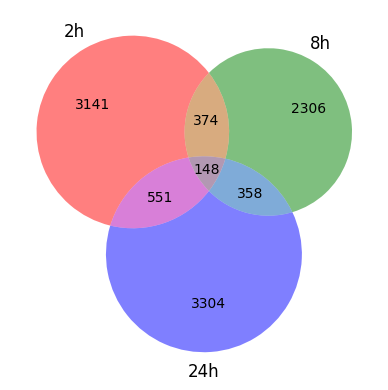

In [24]:
# Practice 11.
## draw a venn diagram
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

def draw_venn3(list1, list2, list3, g1, g2, g3):
    s1 =len(set(list1) - set(list2) - set(list3))
    s2 = len(set(list2) - set(list1) - set(list3))
    s3 = len(set(list1) & set(list2) - set(list3))
    s4 = len(set(list3) - set(list1) - set(list2))
    s5 = len(set(list1) & set(list3) - set(list2))
    s6 = len(set(list2) & set(list3) - set(list1))
    s7 = len(set(list1) & set(list2) & set(list3))
    venn3(subsets=(s1, s2, s3, s4, s5, s6, s7), set_labels=(g1, g2, g3), alpha=0.5)

draw_venn3(up_genes_2h, up_genes_8h, up_genes_24h, '2h', '8h', '24h')
plt.savefig(f'{myDir2}/BIC0711_practice1/venn3.png')
plt.show()